<a href="https://colab.research.google.com/github/liznjoki/liznjoki/blob/main/StrokeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Healthcare Dataset Stroke Prediction
Source of Data is Kaggle
The data contains information on strokes based on gender, age, hypertension, herart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi and smoking_status.

Information is useful in stroke prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation and Cleaning
1. Load the csv file to Pandas
2. Check for any missing values
3. Look at basic information of the columns.

In [ ]:
#Load the csv file to Pandas
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
#Check for any missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Check on the percentage of missing value
data.isnull().sum()/len(data.isnull())*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
#Fill in the missing values
data.bmi.mean().round(1)

28.9

In [ ]:
data.bmi.fillna(data.bmi.mean().round(1), inplace=True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Look at basic information of the columns
data.shape

(5110, 12)

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#Exploratory Data Analysis
###Analyze
1. Gender
2. Age
3. Marriage 
4. Average Glucose Level
5. Work Type
6. Smoking_status


###Gender


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


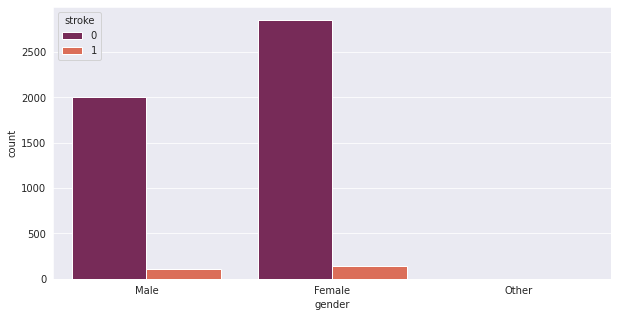

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style(style="darkgrid")
sns.countplot("gender", data=data, hue="stroke", palette="rocket")


###Marriage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


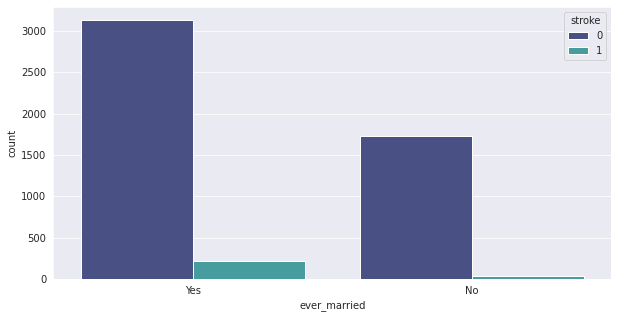

In [ ]:
##Marriage
plt.figure(figsize=(10,5))
sns.set_style(style="darkgrid")
sns.countplot("ever_married", data=data, hue="stroke", palette="mako")

###WorkType


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


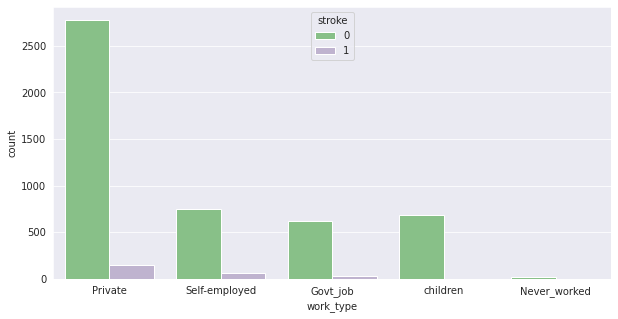

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style(style="darkgrid")
sns.countplot("work_type", data=data, hue="stroke", palette="Accent")

###Smoking Status

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


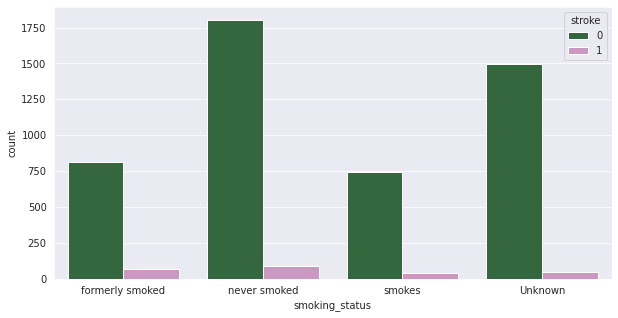

In [ ]:
plt.figure(figsize= (10,5))
sns.set_style(style="darkgrid")
sns.countplot("smoking_status", data=data, hue="stroke", palette="cubehelix")

###Average sugar level


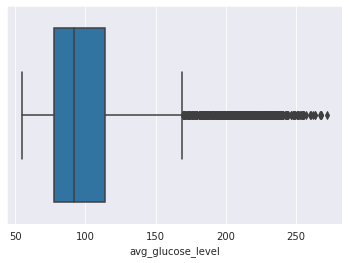

In [ ]:
sns.boxplot(x="avg_glucose_level", data=data)

In [ ]:
data.avg_glucose_level.max()

271.74

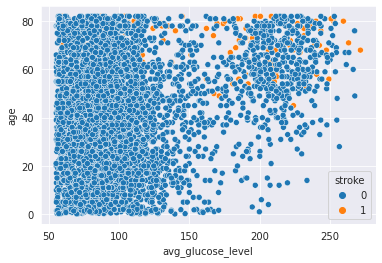

In [ ]:
sns.scatterplot(x="avg_glucose_level", y="age", data=data, hue="stroke")
#People between 40 and 80 are more likely to get a stroke\
#People with an average sugar level of between 100 and 260 are more likely to get a stroke

In [ ]:
#Dealing with outliers

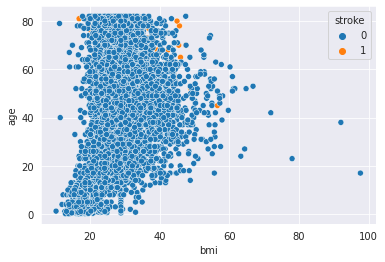

In [ ]:
sns.scatterplot(x="bmi", y="age", data=data, hue="stroke")
#People with a bmi of over 30 are more likely to get a stroke

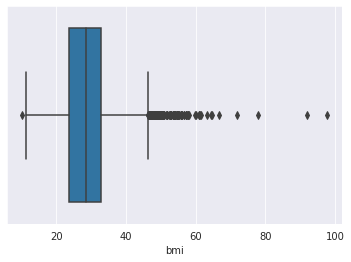

In [ ]:
sns.boxplot(x="bmi", data=data)

In [ ]:
#Using IQR to remove outliers
Q1= np.percentile(data['bmi'], 25)
Q3= np.percentile(data['bmi'], 75)
IQR= Q3-Q1

threshold= 1.5 * IQR
outliers = np.where
data_clean= data["bmi"][~((data["bmi"] < Q1- threshold) | (data["bmi"] > Q3+threshold))]
data_clean.shape


(4984,)

In [ ]:
data_clean[:5]

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [ ]:
data_new= pd.DataFrame(data=data_clean)
data_new.head()

,bmi
0,36.6
1,28.9
2,32.5
3,34.4
4,24.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


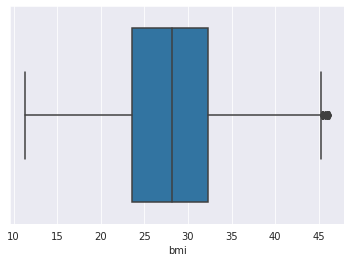

In [ ]:
sns.boxplot(data_new["bmi"])

In [ ]:

data= data[~data['gender'].isin(["Other"])]
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Encode the Categorical Data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["ever_married"] = le.fit_transform(data["ever_married"])
data["work_type"] = le.fit_transform(data["work_type"])
data["Residence_type"]= le.fit_transform(data["Residence_type"])
data["smoking_status"] = le.fit_transform(data["smoking_status"])
col=data[['gender','ever_married','work_type','Residence_type','smoking_status']]

<ipython-input-27-8e9f5ad8bc43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender"] = le.fit_transform(data["gender"])
<ipython-input-27-8e9f5ad8bc43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ever_married"] = le.fit_transform(data["ever_married"])
<ipython-input-27-8e9f5ad8bc43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
data1= pd.concat([col, data_clean, data['stroke'],data['age'],data['hypertension'],data['heart_disease'],
              data['avg_glucose_level']], axis=1, join="inner")
data1.head(10)

,gender,ever_married,work_type,Residence_type,smoking_status,bmi,stroke,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,36.6,1,67.0,0,1,228.69
1,0,1,3,0,2,28.9,1,61.0,0,0,202.21
2,1,1,2,0,2,32.5,1,80.0,0,1,105.92
3,0,1,2,1,3,34.4,1,49.0,0,0,171.23
4,0,1,3,0,2,24.0,1,79.0,1,0,174.12
5,1,1,2,1,1,29.0,1,81.0,0,0,186.21
6,1,1,2,0,2,27.4,1,74.0,1,1,70.09
7,0,0,2,1,2,22.8,1,69.0,0,0,94.39
8,0,1,2,0,0,28.9,1,59.0,0,0,76.15
9,0,1,2,1,0,24.2,1,78.0,0,0,58.57


In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
x=data1.drop(["stroke"], axis="columns")
y= data1["stroke"]

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer()
x_scaled =  scaler.fit_transform(x)



Before Over Sampling 3737


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


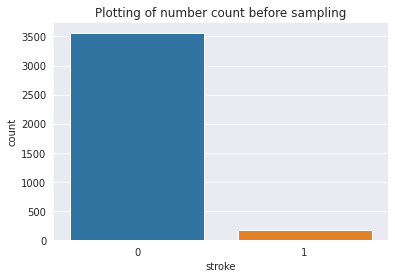

After Over Samplin 7130


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


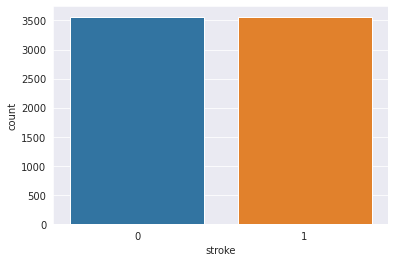

In [ ]:
#train_test_split and deal with minority samples taken of people with strokes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
from imblearn.over_sampling import SMOTE
counter = len(y_train)
print("Before Over Sampling", counter)
sns.countplot(y_train)
plt.title("Plotting of number count before sampling")
plt.show()

#Oversampling the train datasets using SMOTE
smote= SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
counter= len(y_train_smote)
print("After Over Samplin", counter)
sns.countplot(y_train_smote)
plt.show()

In [ ]:
#Making the model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf =  RandomForestClassifier(n_estimators=10)
rf.fit(X_train_smote, y_train_smote)
predictions= rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy score: {round(accuracy*100, 2)}%")

Accuracy score: 92.22%


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1172
           1       0.17      0.08      0.11        74

    accuracy                           0.92      1246
   macro avg       0.56      0.53      0.53      1246
weighted avg       0.90      0.92      0.91      1246



In [ ]:
print(confusion_matrix(y_test, predictions))

[[1143   29]
 [  68    6]]


#Insights
1. Which gender has suffered more strokes? More females are susceptible to strokes
2. What percentage of married people have suffered a stroke? Married folks are more likely to suffer a stroke.
3. What is the number of strokes across the different work-types? Folks who work in the private sector from this data suffered the most strokes.Interesting that people who never smoked had a higher chance of getting a stroke.